# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

From a data perspective, we are tasked with identifying the most important features that drive the price of a used car. This task will involve applying the CRISP-DM framework, figuring out patterns in the data set, and applying the data to different models to see which one yields the lowest error.  

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

For data understanding, I would use functions such as .info() and .describe() to see the features and the statistics of the numerical columns. I would also make a pairplot of the numerical columns to see if there are any correlations that can be drawn before processing the data. 

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [276]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 

from pandas.plotting import scatter_matrix
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [277]:
# read entire data set 
cars_df = pd.read_csv("data/vehicles.csv")
cars_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [278]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [279]:
# drop all rows with any NaNs/Nulls
cars_df_cleaned = cars_df.dropna()
cars_df_cleaned

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,7303227528,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy
426792,7303114896,wyoming,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy
426793,7303112347,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy
426833,7302338378,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible,white,wy


In [321]:
cars_df_cleaned.describe()

,price,year,odometer
count,34868.000000,34868.000000,3.486800e+04
mean,15837.446771,2011.176867,1.073991e+05
std,13460.056823,7.162332,9.990878e+04
min,0.000000,1905.000000,0.000000e+00
25%,6500.000000,2008.000000,6.516400e+04
50%,12000.000000,2013.000000,1.040000e+05
75%,22003.500000,2016.000000,1.411678e+05
max,155000.000000,2022.000000,9.999999e+06


In [327]:
max_value = cars_df_cleaned["odometer"].max()
cars_df_cleaned[cars_df_cleaned["odometer"] == 0]

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
23203,bakersfield,66995,2018.0,ram,excellent,6 cylinders,diesel,0.0,clean,automatic,4wd,full-size,pickup,grey,ca
23263,bakersfield,69995,2018.0,ram,excellent,6 cylinders,diesel,0.0,clean,automatic,4wd,full-size,pickup,grey,ca
24111,chico,43950,2011.0,chevrolet,excellent,8 cylinders,diesel,0.0,clean,automatic,4wd,full-size,pickup,grey,ca
26781,fresno / madera,43950,2011.0,chevrolet,excellent,8 cylinders,diesel,0.0,clean,automatic,4wd,full-size,pickup,grey,ca
28524,gold country,43950,2011.0,chevrolet,excellent,8 cylinders,diesel,0.0,clean,automatic,4wd,full-size,pickup,grey,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368710,dallas / fort worth,18995,2010.0,ford,excellent,8 cylinders,diesel,0.0,clean,automatic,4wd,full-size,pickup,white,tx
368984,dallas / fort worth,29995,2007.0,ram,excellent,6 cylinders,diesel,0.0,clean,automatic,4wd,full-size,pickup,white,tx
373418,el paso,29999,2018.0,audi,excellent,6 cylinders,gas,0.0,clean,automatic,rwd,full-size,SUV,white,tx
378311,lubbock,3995,2006.0,ford,good,8 cylinders,gas,0.0,clean,automatic,rwd,full-size,truck,grey,tx


In [280]:
cars_df_numerical = cars_df_cleaned.select_dtypes(include = "number")
cars_df_numerical

,id,price,year,odometer
126,7305672709,0,2018.0,68472.0
127,7305672266,0,2019.0,69125.0
128,7305672252,0,2018.0,66555.0
215,7316482063,4000,2002.0,155000.0
219,7316429417,2500,1995.0,110661.0
...,...,...,...,...
426788,7303227528,12995,2016.0,61127.0
426792,7303114896,32999,2014.0,154642.0
426793,7303112347,15999,2018.0,36465.0
426833,7302338378,6800,1997.0,69550.0


In [281]:
len(cars_df_numerical["id"].unique())

34868

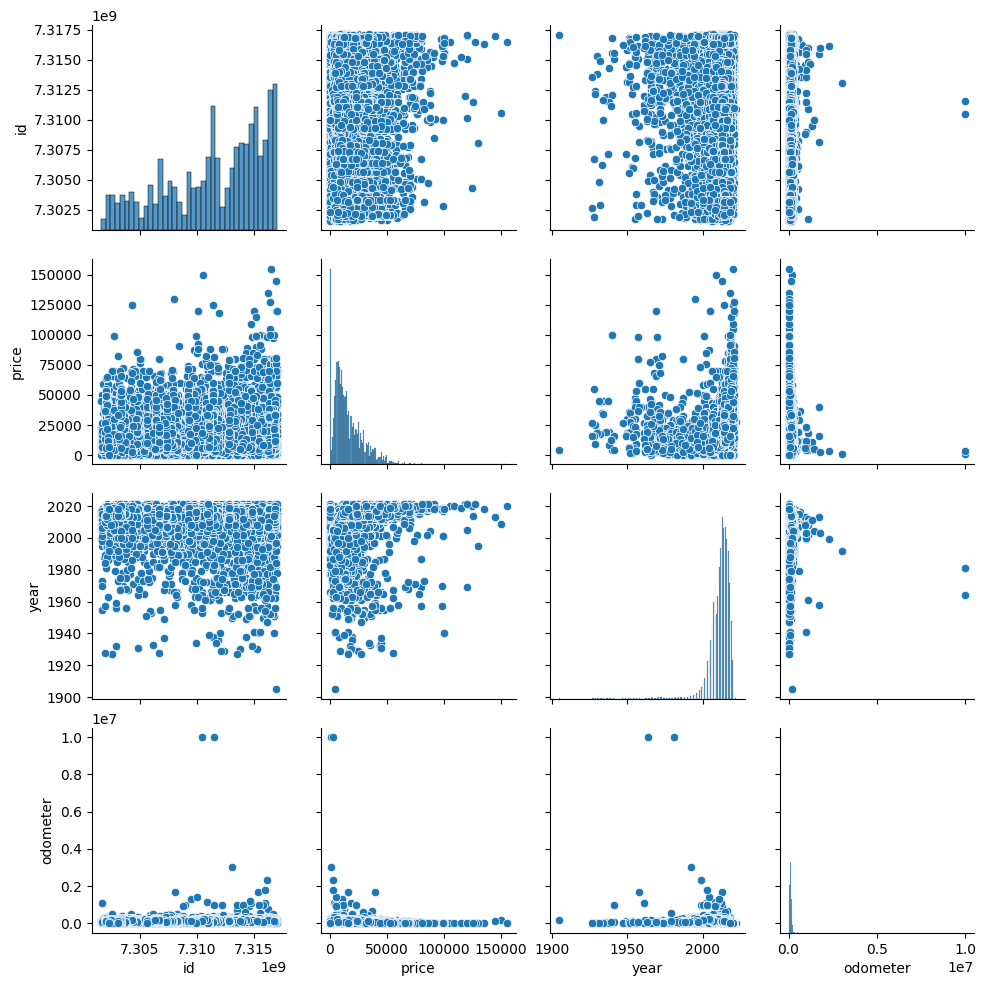

In [220]:
# checking pairplot of numerical columns to find any patterns
# nothing too important to see other than POTENTIALLY a trend of price increasing with the year of the car model 
sns.pairplot(cars_df_numerical)

In [ ]:
# checking mean of prices vs different entries of all categorical columns to find potential correlations 

In [282]:
cars_df_categorical = cars_df_cleaned.select_dtypes(exclude = "number")
cars_df_categorical

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
126,auburn,chevrolet,express cargo van,like new,6 cylinders,gas,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,auburn,chevrolet,express cargo van,like new,6 cylinders,gas,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,auburn,chevrolet,express cargo van,like new,6 cylinders,gas,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,birmingham,toyota,echo,excellent,4 cylinders,gas,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,birmingham,bmw,525i,fair,6 cylinders,gas,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,wyoming,chevrolet,cruze lt,like new,4 cylinders,gas,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy
426792,wyoming,ford,"f350, xlt",excellent,8 cylinders,diesel,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy
426793,wyoming,chevrolet,"cruze, lt",excellent,4 cylinders,gas,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy
426833,wyoming,jaguar,xk8 convertible,good,8 cylinders,gas,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible,white,wy


In [283]:
# compare categorical values to price to see if there are any patterns 
cars_price_vs_drive = cars_df_cleaned.groupby("drive")[["price"]].mean()
cars_price_vs_drive

,price
drive,
4wd,19484.415635
fwd,9298.126849
rwd,17359.752482


Text(0.5, 1.0, 'Price vs Drive')

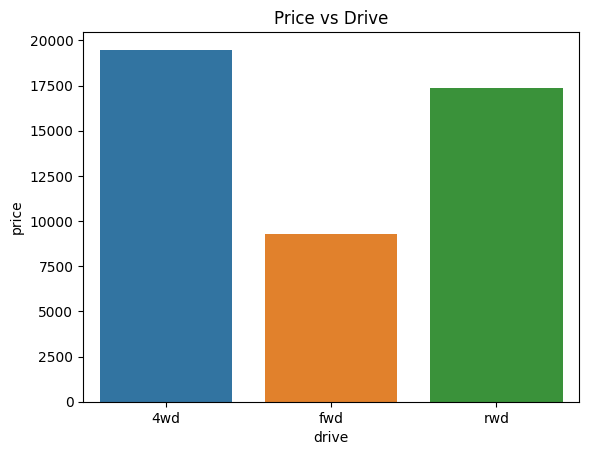

In [332]:
#plt.bar(cars_price_vs_drive.index, cars_price_vs_drive["price"])
#px.bar(cars_price_vs_drive, x = cars_price_vs_drive.index, y = "price", title = "Price vs Drive" )
sns.barplot(cars_price_vs_drive, x = cars_price_vs_drive.index, y = "price")
plt.title("Price vs Drive")

In [285]:
cars_price_vs_status = cars_df_cleaned.groupby("title_status")[["price"]].mean()
cars_price_vs_status

,price
title_status,
clean,15826.576555
lien,22510.417910
missing,4060.714286
parts only,5387.500000
rebuilt,16803.473418
salvage,11231.741667


Text(0.5, 1.0, 'Price vs Status')

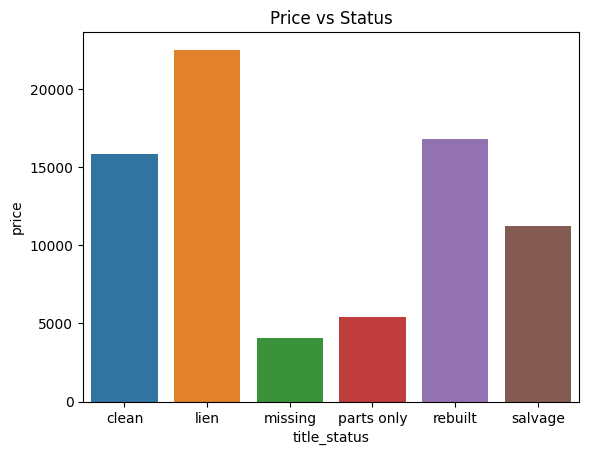

In [333]:
#px.bar(cars_price_vs_status, x = cars_price_vs_status.index, y = "price", title = "Price vs Status" )
sns.barplot(cars_price_vs_status, x = cars_price_vs_status.index, y = "price")
plt.title("Price vs Status")

In [320]:
cars_price_vs_cyls = cars_df_cleaned.groupby("cylinders")[["price"]].mean()
cars_price_vs_cyls

,price
cylinders,
10 cylinders,15505.323894
12 cylinders,14323.545455
3 cylinders,11150.746269
4 cylinders,10923.846222
5 cylinders,8731.313167
6 cylinders,15194.296092
8 cylinders,21821.011896
other,17216.333333


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '10 cylinders'),
  Text(1, 0, '12 cylinders'),
  Text(2, 0, '3 cylinders'),
  Text(3, 0, '4 cylinders'),
  Text(4, 0, '5 cylinders'),
  Text(5, 0, '6 cylinders'),
  Text(6, 0, '8 cylinders'),
  Text(7, 0, 'other')])

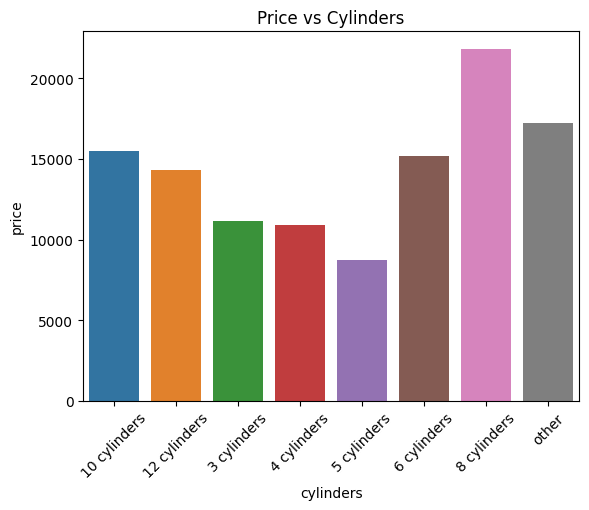

In [336]:
#px.bar(cars_price_vs_cyls, x = cars_price_vs_cyls.index, y = "price", title = "Price vs Cylinders" )
sns.barplot(cars_price_vs_cyls, x = cars_price_vs_cyls.index, y = "price")
plt.title("Price vs Cylinders")
plt.xticks(rotation = 45)

In [289]:
cars_price_vs_ts = cars_df_cleaned.groupby("transmission")[["price"]].mean()
cars_price_vs_ts

,price
transmission,
automatic,16091.555918
manual,14533.777909
other,7188.895565


Text(0.5, 1.0, 'Price vs Transmission')

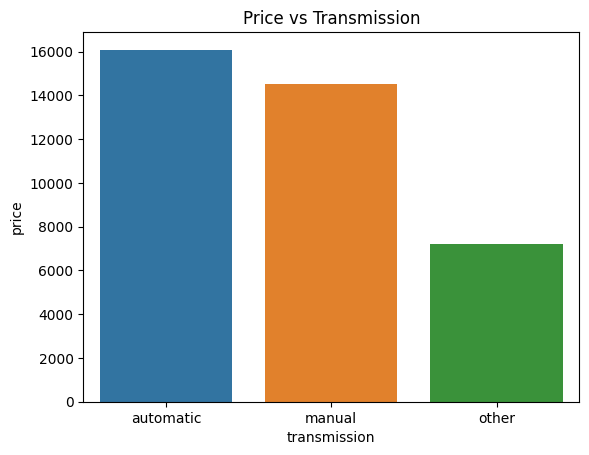

In [337]:
#px.bar(cars_price_vs_ts, x = cars_price_vs_ts.index, y = "price", title = "Price vs Transmission" )
sns.barplot(cars_price_vs_ts, x = cars_price_vs_ts.index, y = "price")
plt.title("Price vs Transmission")

In [291]:
cars_price_vs_color = cars_df_cleaned.groupby("paint_color")[["price"]].mean()
cars_price_vs_color

,price
paint_color,
black,16775.723963
blue,13258.345395
brown,11954.926946
custom,15009.381798
green,12743.437428
grey,14421.783751
orange,17291.431250
purple,9844.222222
red,15826.521892


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'black'),
  Text(1, 0, 'blue'),
  Text(2, 0, 'brown'),
  Text(3, 0, 'custom'),
  Text(4, 0, 'green'),
  Text(5, 0, 'grey'),
  Text(6, 0, 'orange'),
  Text(7, 0, 'purple'),
  Text(8, 0, 'red'),
  Text(9, 0, 'silver'),
  Text(10, 0, 'white'),
  Text(11, 0, 'yellow')])

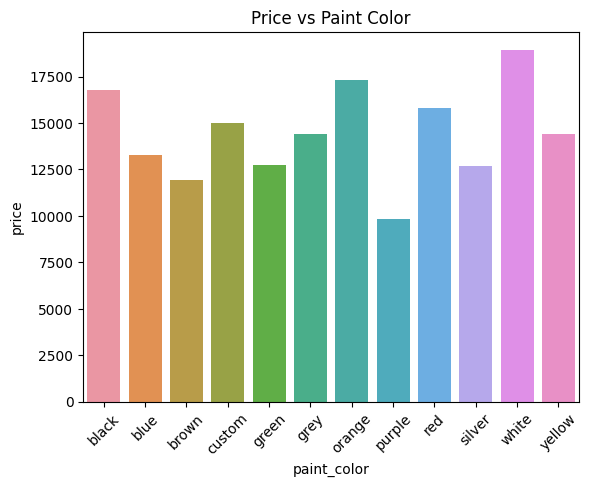

In [339]:
#px.bar(cars_price_vs_color, x = cars_price_vs_color.index, y = "price", title = "Price vs Color" )
sns.barplot(cars_price_vs_color, x = cars_price_vs_color.index, y = "price")
plt.title("Price vs Paint Color")
plt.xticks(rotation = 45)

In [293]:
cars_price_vs_manu = cars_df_cleaned.groupby("manufacturer")[["price"]].mean()
cars_price_vs_manu

,price
manufacturer,
acura,10790.147860
alfa-romeo,23893.133333
aston-martin,57280.000000
audi,14323.104444
bmw,13056.934338
buick,10557.770619
cadillac,14045.394990
chevrolet,17583.792135
chrysler,8880.650558


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'acura'),
  Text(1, 0, 'alfa-romeo'),
  Text(2, 0, 'aston-martin'),
  Text(3, 0, 'audi'),
  Text(4, 0, 'bmw'),
  Text(5, 0, 'buick'),
  Text(6, 0, 'cadillac'),
  Text(7, 0, 'chevrolet'),
  Text(8, 0, 'chrysler'),
  Text(9, 0, 'datsun'),
  Text(10, 0, 'dodge'),
  Text(11, 0, 'ferrari'),
  Text(12, 0, 'fiat'),
  Text(13, 0, 'ford'),
  Text(14, 0, 'gmc'),
  Text(15, 0, 'harley-davidson'),
  Text(16, 0, 'honda'),
  Text(17, 0, 'hyundai'),
  Text(18, 0, 'infiniti'),
  Text(19, 0, 'jaguar'),
  Text(20, 0, 'jeep'),
  Text(21, 0, 'kia'),
  Text(22, 0, 'land rover'),
  Text(23, 0, 'lexus'),
  Text(24, 0, 'lincoln'),
  Text(25, 0, 'mazda'),
  Text(26, 0, 'mercedes-benz'),
  Text(27, 0, 'mercury'),
  Text(28, 0, 'mini'),
  Text(29, 0, 'mitsubishi'),
  Text(30, 0, 'nissan'),
  Text(31, 0, 'pontiac'

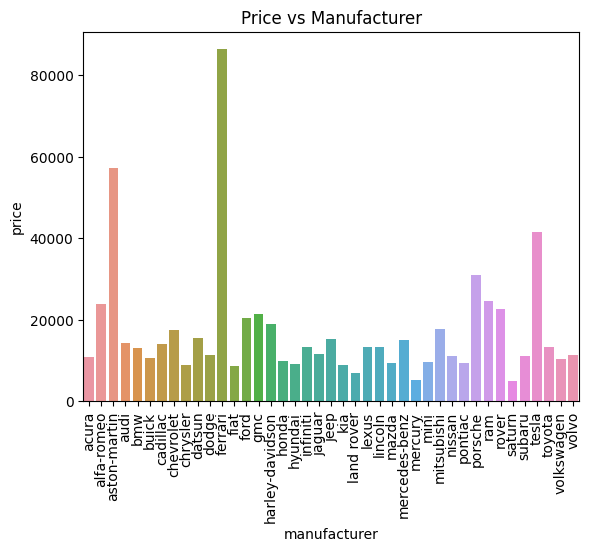

In [341]:
#px.bar(cars_price_vs_manu, x = cars_price_vs_manu.index, y = "price", title = "Price vs Manufacturer" )
sns.barplot(cars_price_vs_manu, x = cars_price_vs_manu.index, y = "price")
plt.title("Price vs Manufacturer")
plt.xticks(rotation = 90)

In [295]:
# testing to see if models can be grouped into generic lists
# I found that this was too tedious so I disregarded the model row, as it would have too many columns for one hot encoding

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Sample list of strings
#strings = ["zx4", "zx3", "zz", "Benz", "Benz z9", "Ferrari"]
strings = cars_df_cleaned["model"].unique()

# Define a similarity threshold
similarity_threshold = 50

# Create an empty list to store grouped strings
grouped_lists = []

# Iterate through the strings
for string in strings:
    found = False
    for group in grouped_lists:
        for item in group:
            if fuzz.ratio(string, item) >= similarity_threshold:
                group.append(string)
                found = True
                break
        if found:
            break
    if not found:
        grouped_lists.append([string])

print(grouped_lists)
# Lots of unique models -> can take out 

[['express cargo van', 'express', 'express commercial cutaway', 'econoline cargo van', 'econoline commercial cutaway', 'savana commercial cutaway', 'econoline', 'xjr s', 'promaster city cargo van', 'e-series cutaway', 'corolla le', 'cooper hardtop s', 'corolla', 'accord lx', 'cr-v ex', 'explorer xlt', 'promaster city', 'e150 cargo van', 'expedition xlt', 'express 2500 cargo van', 'nv1500 cargo van', 'cr-v', 'flex se', 'lr4 hse', 'civic lx', 'enclave', 'is 250 awd nav', 'cruze lt', 'es350 nav', 'expedition platinum 4x4 gas', 'escape xlt', 'xj8', 'g500 g-wagon', 'tucson limited', 'wrx sti', 'cooper s', 'rav4 limited', 'jetta s', 'accord ex-l', 'versa sv', 'quest sv', '2500 power wagon', '4runner limited', 'cruze premier rs', '4 runner sr5', 'pacifica', 'wrx', 'sentra s', 'rx 350 awd', 'rav 4 le', 'escape', 'ranger xlt', 'jetta 1.4t s', 'gs 350 awd', 'countryman cooper s', 'escape limited', 'elantra limited', 'is350', 'rx350 f sport', 'flex', 'f-150 king ranch', 'explorer xlt awd', 'equin

In [296]:
cars_price_vs_state = cars_df_cleaned.groupby("state")[["price"]].mean()
cars_price_vs_state

,price
state,
ak,27367.751861
al,19310.169014
ar,10286.556000
az,15780.725000
ca,15452.759607
co,13514.446781
ct,10874.137466
dc,10633.016484
de,21992.080357


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'ak'),
  Text(1, 0, 'al'),
  Text(2, 0, 'ar'),
  Text(3, 0, 'az'),
  Text(4, 0, 'ca'),
  Text(5, 0, 'co'),
  Text(6, 0, 'ct'),
  Text(7, 0, 'dc'),
  Text(8, 0, 'de'),
  Text(9, 0, 'fl'),
  Text(10, 0, 'ga'),
  Text(11, 0, 'hi'),
  Text(12, 0, 'ia'),
  Text(13, 0, 'id'),
  Text(14, 0, 'il'),
  Text(15, 0, 'in'),
  Text(16, 0, 'ks'),
  Text(17, 0, 'ky'),
  Text(18, 0, 'la'),
  Text(19, 0, 'ma'),
  Text(20, 0, 'md'),
  Text(21, 0, 'me'),
  Text(22, 0, 'mi'),
  Text(23, 0, 'mn'),
  Text(24, 0, 'mo'),
  Text(25, 0, 'ms'),
  Text(26, 0, 'mt'),
  Text(27, 0, 'nc'),
  Text(28, 0, 'nd'),
  Text(29, 0, 'ne'),
  Text(30, 0, 'nh'),
  Text(31, 0, 'nj'),
  Text(32, 0, 'nm'),
  Text(33, 0, 'nv'),
  Text(34, 0, 'ny'),
  Text(35, 0, 'oh'),
  Text(36, 0, 'ok'),
  T

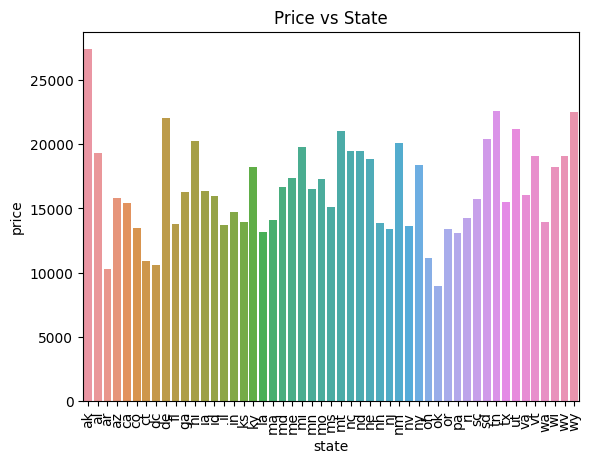

In [343]:
#px.bar(cars_price_vs_state, x = cars_price_vs_state.index, y = "price", title = "Price vs State" )
sns.barplot(cars_price_vs_state, x = cars_price_vs_state.index, y = "price")
plt.title("Price vs State")
plt.xticks(rotation = 90)

In [298]:
cars_price_vs_type = cars_df_cleaned.groupby("type")[["price"]].mean()
cars_price_vs_type

,price
type,
SUV,14228.520371
bus,13737.627907
convertible,16504.733010
coupe,15021.656397
hatchback,9305.195940
mini-van,10124.476575
offroad,21513.180723
other,16699.272727
pickup,22220.057164


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'SUV'),
  Text(1, 0, 'bus'),
  Text(2, 0, 'convertible'),
  Text(3, 0, 'coupe'),
  Text(4, 0, 'hatchback'),
  Text(5, 0, 'mini-van'),
  Text(6, 0, 'offroad'),
  Text(7, 0, 'other'),
  Text(8, 0, 'pickup'),
  Text(9, 0, 'sedan'),
  Text(10, 0, 'truck'),
  Text(11, 0, 'van'),
  Text(12, 0, 'wagon')])

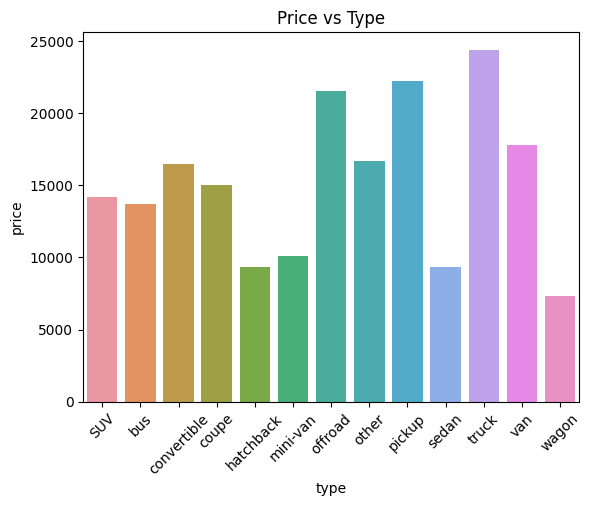

In [345]:
#px.bar(cars_price_vs_type, x = cars_price_vs_type.index, y = "price", title = "Price vs Type")
sns.barplot(cars_price_vs_type, x = cars_price_vs_type.index, y = "price")
plt.title("Price vs Type")
plt.xticks(rotation = 45)

In [300]:
cars_price_vs_region = cars_df_cleaned.groupby("region")[["price"]].mean()
cars_price_vs_region

,price
region,
SF bay area,18852.221106
abilene,16069.600000
akron / canton,12710.576000
albany,24638.891176
albuquerque,21095.508772
...,...
york,15686.479452
youngstown,10082.116883
yuba-sutter,16496.437500


Text(0.5, 1.0, 'Price vs Region')

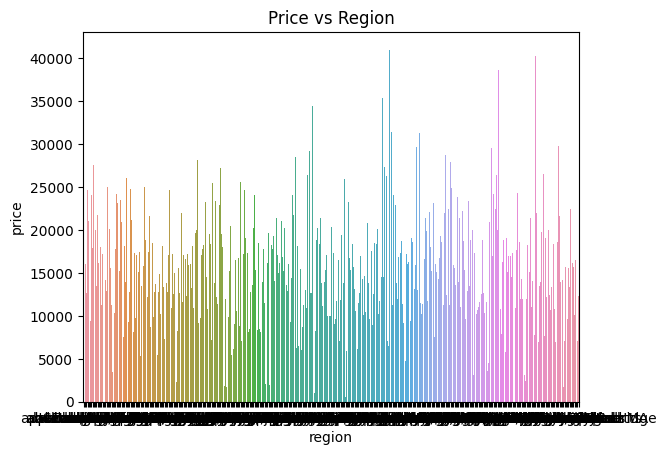

In [348]:
#px.bar(cars_price_vs_region, x = cars_price_vs_region.index, y = "price", title = "Price vs Region")
sns.barplot(cars_price_vs_region, x = cars_price_vs_region.index, y = "price")
plt.title("Price vs Region")

# plotly bar is much better but sometimes doesn't load 

In [302]:
''' dropping non-important columns that won't be necessary with model trainin g
removing model feature because of too many unique values (over 5000) and one hot encoding this columns would make
training and processing of the data too long '''
cars_df_cleaned = cars_df_cleaned.drop(columns = ["model", "id", "VIN"])
cars_df_cleaned

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
126,auburn,0,2018.0,chevrolet,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white,al
127,auburn,0,2019.0,chevrolet,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white,al
128,auburn,0,2018.0,chevrolet,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white,al
215,birmingham,4000,2002.0,toyota,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,birmingham,2500,1995.0,bmw,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,wyoming,12995,2016.0,chevrolet,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy
426792,wyoming,32999,2014.0,ford,excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy
426793,wyoming,15999,2018.0,chevrolet,excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy
426833,wyoming,6800,1997.0,jaguar,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,wy


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [303]:
# separate numerical and categorical columns (to one hot encode)

In [305]:
categorical_cols = cars_df_cleaned.select_dtypes(exclude = "number").columns.tolist()
numerical_cols = cars_df_cleaned.select_dtypes(include = "number").drop(columns = ["price"]).columns.tolist()

transformers = [
    ('one_hot', OneHotEncoder(), categorical_cols),
    ('scaling', StandardScaler(), numerical_cols)
]

preprocessor = ColumnTransformer(transformers)
preprocessor

ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                 ['region', 'manufacturer', 'condition',
                                  'cylinders', 'fuel', 'title_status',
                                  'transmission', 'drive', 'size', 'type',
                                  'paint_color', 'state']),
                                ('scaling', StandardScaler(),
                                 ['year', 'odometer'])])

In [306]:
# split data into training and test sets 
X = cars_df_cleaned.drop(columns = ["price"])
y = cars_df_cleaned["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pipe = Pipeline([
    ("preprocessor", preprocessor), 
    ("linreg", LinearRegression())
])

pipe.fit(X_train, y_train)
y_preds = pipe.predict(X_test)
y_preds

array([14708.43559434, 15316.75623456, 22624.06971291, ...,
        9740.40632573, 33960.51560676, 15186.049248  ])

In [307]:
result = permutation_importance(pipe, X_test, y_test, n_repeats = 50, random_state = 42)
result

{'importances_mean': array([0.12590387, 0.09425026, 0.03157906, 0.02376604, 0.02868064,
        0.1085388 , 0.05863965, 0.00106033, 0.01745574, 0.02917616,
        0.01827726, 0.05824865, 0.00456037, 0.06792452]),
 'importances_std': array([0.00348033, 0.00432617, 0.00215065, 0.00195512, 0.00237875,
        0.0048432 , 0.00402395, 0.0004934 , 0.001745  , 0.00231917,
        0.00156638, 0.00351212, 0.00070617, 0.00304555]),
 'importances': array([[ 0.12893144,  0.12855996,  0.13054252,  0.11959242,  0.12418932,
          0.12735572,  0.12675094,  0.12460976,  0.12440373,  0.1263161 ,
          0.12418514,  0.1267975 ,  0.12204159,  0.12858855,  0.12292149,
          0.12685473,  0.12703329,  0.12808305,  0.12515309,  0.12252457,
          0.12845719,  0.12885138,  0.12268806,  0.12535374,  0.12884636,
          0.12083648,  0.12740958,  0.13090563,  0.12708039,  0.12974072,
          0.12977269,  0.12741831,  0.12635934,  0.1182973 ,  0.13203185,
          0.11875448,  0.12446704,  0.12

In [273]:
scores = result.importances_mean
scores

impValues = pd.DataFrame({"Feature": X_test.columns, "Value": scores})
impValues = impValues.sort_values(by = "Value", ascending = False)

impValues

,Feature,Value
0,region,0.125904
5,fuel,0.108539
1,year,0.094250
13,state,0.067925
6,odometer,0.058640
11,type,0.058249
2,manufacturer,0.031579
9,drive,0.029176
4,cylinders,0.028681
3,condition,0.023766


In [314]:
X = cars_df_cleaned.drop(columns = ["price"])
y = cars_df_cleaned["price"]

In [318]:
categorical_cols = ["region", "fuel", "state", "type"]
numerical_cols = ["year", "odometer"]
cols = categorical_cols + numerical_cols

transformers = [
    ('one_hot', OneHotEncoder(), categorical_cols),
    ('scaling', StandardScaler(), numerical_cols)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

preprocessor = ColumnTransformer(transformers)

pipeline = Pipeline([
    ("preprocessor", preprocessor), 
    ("linreg", LinearRegression())
])

pipeline.fit(X_train[cols], y_train)

y_preds = pipeline.predict(X_test[cols])

MSE = mean_squared_error(y_preds, y_test)
MAE = mean_absolute_error(y_preds, y_test)
print(MSE, MAE)

119664525.44432974 6875.850464294801


In [245]:
mse1 = mean_squared_error(y_preds, y_test)
mae1 = mean_absolute_error(y_preds, y_test)
print(mse1, mae1)

105638024.59486495 6438.595049219284


In [246]:
# new model with sequentialfeatureselector 
# split data into training and test sets 
X = cars_df_cleaned.drop(columns = ["price"])
y = cars_df_cleaned["price"]

categorical_cols = cars_df_cleaned.select_dtypes(exclude = "number").columns.tolist()
categorical_df = cars_df_cleaned.select_dtypes(exclude = "number")
numerical_cols = cars_df_cleaned.select_dtypes(include = "number").drop(columns = ["price"]).columns.tolist()
#numerical_df = cars_df_cleaned.select_dtypes(include = "number").drop(columns = ["price"])
#numerical_cols = cars_df_cleaned.select_dtypes(include = "number").columns.tolist()
numerical_df = cars_df_cleaned.select_dtypes(include = "number")
numerical_df = numerical_df.drop(columns = ["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()

categorical_df = pd.get_dummies(categorical_df, columns = categorical_cols).astype("int")
numerical_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns = numerical_cols, index = numerical_df.index)

In [247]:
categorical_df

,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [248]:
numerical_df

,year,odometer
126,0.952655,-0.389632
127,1.092276,-0.383096
128,0.952655,-0.408820
215,-1.281286,0.476451
219,-2.258636,0.032649
...,...,...
426788,0.673412,-0.463150
426792,0.394170,0.472867
426793,0.952655,-0.709999
426833,-1.979393,-0.378842


In [249]:
cars_df_encoded_scaled = pd.concat([categorical_df, numerical_df], axis = 1)
cars_df_encoded_scaled

,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,...,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,year,odometer
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.952655,-0.389632
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.092276,-0.383096
128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.952655,-0.408820
215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.281286,0.476451
219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-2.258636,0.032649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.673412,-0.463150
426792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.394170,0.472867
426793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.952655,-0.709999
426833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-1.979393,-0.378842


In [250]:
X = cars_df_encoded_scaled
y = cars_df_cleaned["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sfs = SequentialFeatureSelector(Lasso(), n_features_to_select = 4)
sfs.fit(X_train, y_train)
#features_sf = X_train.columns[sflasso.get_support()]
features_to_use = X_train.columns[sfs.get_support()]
features_to_use

Index(['cylinders_8 cylinders', 'fuel_diesel', 'drive_fwd', 'year'], dtype='object')

In [251]:
pipe2 = Pipeline([
    ("linreg", LinearRegression())
])

pipe2.fit(X_train[features_to_use], y_train)

y_preds = pipe2.predict(X_test[features_to_use])

mse2 = mean_squared_error(y_preds, y_test)
mae2 = mean_absolute_error(y_preds, y_test)
print(mse2, mae2)

135589588.32651547 7703.795204320425


In [252]:
# new model with no region and Ridge Regression 
cars_df_no_region = cars_df_cleaned.drop(columns = ["region", "price"])
cars_df_no_region

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
126,2018.0,chevrolet,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white,al
127,2019.0,chevrolet,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white,al
128,2018.0,chevrolet,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white,al
215,2002.0,toyota,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,1995.0,bmw,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,2016.0,chevrolet,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy
426792,2014.0,ford,excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy
426793,2018.0,chevrolet,excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy
426833,1997.0,jaguar,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,wy


In [253]:
scaler = StandardScaler()

categorical_cols = cars_df_no_region.select_dtypes(exclude = "number").columns.tolist()
numerical_cols = cars_df_no_region.select_dtypes(include = "number").columns.tolist()

categorical_df = cars_df_no_region.select_dtypes(exclude = "number")
numerical_df = cars_df_no_region.select_dtypes(include = "number")

categorical_df = pd.get_dummies(categorical_df, columns = categorical_cols).astype("int")
numerical_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns = numerical_cols, index = numerical_df.index)

cars_new_df = pd.concat([categorical_df, numerical_df], axis = 1)
cars_new_df
#categorical_df
#numerical_df

,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,...,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,year,odometer
126,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.952655,-0.389632
127,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.092276,-0.383096
128,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.952655,-0.408820
215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.281286,0.476451
219,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-2.258636,0.032649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0.673412,-0.463150
426792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.394170,0.472867
426793,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0.952655,-0.709999
426833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-1.979393,-0.378842


In [254]:
X = cars_new_df
y = cars_df_cleaned["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rflasso = RFE(Lasso(), n_features_to_select = 5)
rflasso.fit(X_train, y_train)
features_rf = X_train.columns[rflasso.support_]
features_rf

Index(['manufacturer_aston-martin', 'manufacturer_ferrari',
       'manufacturer_porsche', 'manufacturer_tesla', 'fuel_diesel'],
      dtype='object')

In [255]:
ridge = Ridge()
ridge.fit(X_train[features_rf], y_train)
y_preds = ridge.predict(X_test[features_rf])
mse3 = mean_squared_error(y_preds, y_test)
mae3 = mean_absolute_error(y_preds, y_test)
print(mse3, mae3)

161638313.39723247 9445.677761236744


(array([0, 1, 2]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Linear Regression with SFS'),
  Text(2, 0, 'Ridge Regression with RFE')])

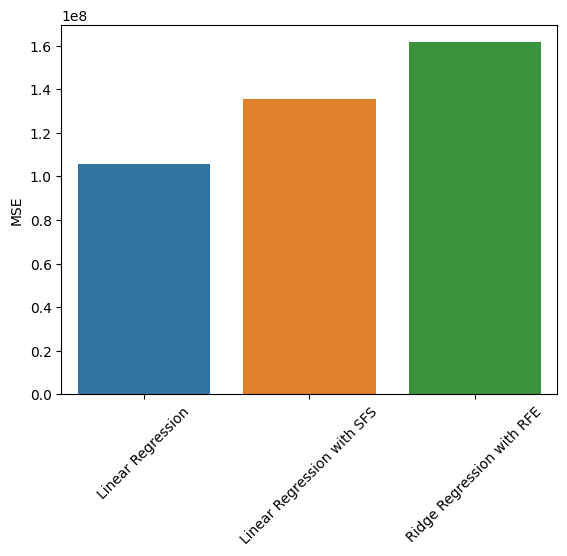

In [266]:
errors = {
    "Linear Regression" : (mse1), 
    "Linear Regression with SFS" : (mse2), 
    "Ridge Regression with RFE" : (mse3)
}

mse_errors_df = pd.DataFrame(errors.values(), columns = ["MSE"], index = errors.keys())

sns.barplot(mse_errors_df, x = mse_errors_df.index, y = "MSE")
plt.xticks(rotation = 45)

(array([0, 1, 2]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Linear Regression with SFS'),
  Text(2, 0, 'Ridge Regression with RFE')])

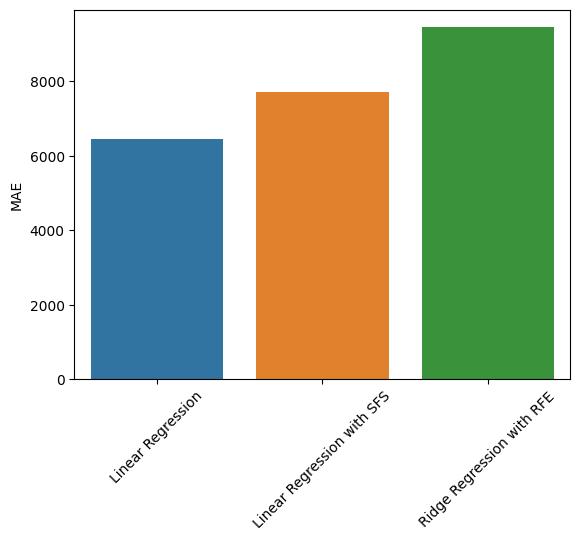

In [267]:
errors = {
    "Linear Regression" : (mae1), 
    "Linear Regression with SFS" : (mae2), 
    "Ridge Regression with RFE" : (mae3)
}

mse_errors_df = pd.DataFrame(errors.values(), columns = ["MAE"], index = errors.keys())

sns.barplot(mse_errors_df, x = mse_errors_df.index, y = "MAE")
plt.xticks(rotation = 45)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
'''
The Regular Linear Regression model with all features performed the best out of the 3 models with predicting the price
of the car

The features that seemed to be of the most importance given by the permutation importance were the region, year, odometer, 
type, state, and fuel. 

If I were to continue modeling with this data set, I would definitely revisit the specifics of these features and see if I could
work with more Ridge models with a different feature selection to minimize the overfitting and create a more generalized model. 

'''

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
'''
Findings/Report in readme.md in folder 
'''